ELLIPSE Dataset Evaluation
---
[Alejandro Ciuba](https://alejandrociuba.github.io), alejandrociuba@pitt.edu
---

## Summary

This notebook takes a brief look at the data found within the [ELLIPSE](https://github.com/scrosseye/ELLIPSE-Corpus/tree/main) dataset

---

## Necessary Imports

In [1]:
import nltk
import regex


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Settings

In [2]:
plt.style.use('ggplot')

In [3]:
%pprint

Pretty printing has been turned OFF


---
## Globals

In [4]:
ELLIPSE = "data/ELLIPSE/ELLIPSE_Final_github.csv"

### Useful Functions

In [5]:
def format_graph(ax: plt.Axes, **kwargs) -> plt.Axes:
    """
    Formats, displays and clears graph.
    """

    if 'fmt' in kwargs:
        for i in ax.containers:
            ax.bar_label(i, fmt=kwargs['fmt'])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    return ax

### Datasets

In [6]:
df = pd.read_csv(ELLIPSE)

In [7]:
# Standardize the text column
col = "text"
df = df.rename(columns={'full_text': col})

In [8]:
def clean(x: str) -> str:

    return x.lower().strip()

df['text'] = df['text'].map(clean)

In [9]:
df.sample(1)

,text_id_kaggle,text,gender,grade,race_ethnicity,num_words,num_words2,num_words3,num_sent,num_para,...,task,SES,prompt,Overall,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Conventions
2803,D91D25F55AD9,this world would never be how it is now if it ...,Female,11,Hispanic/Latino,372,423,410,32,5,...,Independent,Economically disadvantaged,Impact of technology,4.0,4.0,4.0,3.5,4.0,4.0,4.5


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text_id_kaggle     6482 non-null   object 
 1   text               6482 non-null   object 
 2   gender             6482 non-null   object 
 3   grade              6482 non-null   int64  
 4   race_ethnicity     6482 non-null   object 
 5   num_words          6482 non-null   int64  
 6   num_words2         6482 non-null   int64  
 7   num_words3         6482 non-null   int64  
 8   num_sent           6482 non-null   int64  
 9   num_para           6482 non-null   int64  
 10  num_word_div_para  6482 non-null   float64
 11  MTLD               6482 non-null   float64
 12  TTR                6482 non-null   float64
 13  Type               6482 non-null   int64  
 14  Token              6482 non-null   int64  
 15  task               6482 non-null   object 
 16  SES                6481 

---

## Feedback Prize - Evaluating Student Writing

<AxesSubplot:xlabel='gender', ylabel='count'>

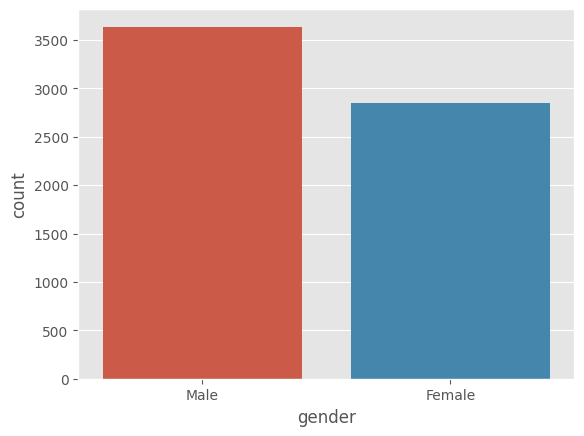

In [11]:
sns.countplot(df, x='gender')

[Text(0, 0, 'Hispanic/Latino'), Text(1, 0, 'Asian/Pacific Islander'), Text(2, 0, 'Black/African American'), Text(3, 0, 'White'), Text(4, 0, 'American Indian/Alaskan Native'), Text(5, 0, 'Two or more races/Other')]

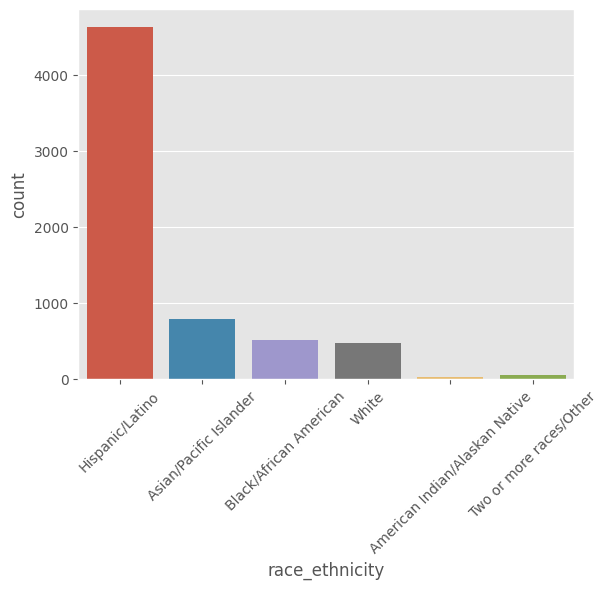

In [12]:
ax = sns.countplot(df, x='race_ethnicity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

<AxesSubplot:xlabel='grade', ylabel='count'>

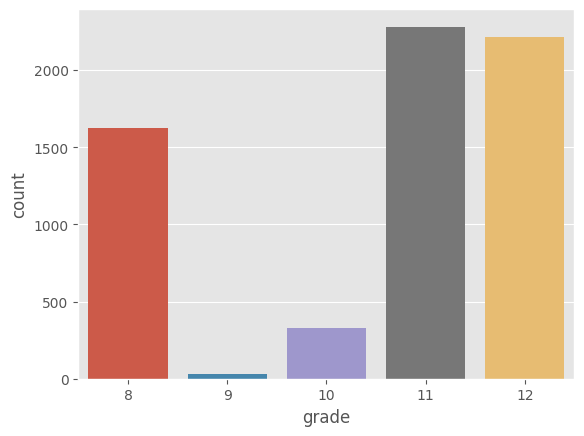

In [13]:
sns.countplot(df, x='grade')

[Text(0, 0, 'Cell phones at school'), Text(1, 0, 'Community service'), Text(2, 0, 'Grades for extracurricular activities'), Text(3, 0, 'Success and failure'), Text(4, 0, 'Cell phones in classrooms'), Text(5, 0, 'Creative arts requirement'), Text(6, 0, 'Distance learning'), Text(7, 0, 'Four-day work week'), Text(8, 0, 'Career commitment'), Text(9, 0, 'Places to visit'), Text(10, 0, 'Extended school day'), Text(11, 0, 'Self-reliance'), Text(12, 0, 'Imagination'), Text(13, 0, 'Working with a group or alone'), Text(14, 0, 'Trying something beyond what you have mastered'), Text(15, 0, 'Letter to employer'), Text(16, 0, 'Internships and shadowing'), Text(17, 0, 'Praising student work'), Text(18, 0, 'Impact of technology'), Text(19, 0, 'Being busy'), Text(20, 0, 'Influencing behavior'), Text(21, 0, 'Spending time outdoors'), Text(22, 0, 'Enjoyable educational activities'), Text(23, 0, 'Year-round school'), Text(24, 0, 'Afterschool homework club'), Text(25, 0, 'Positive attitudes'), Text(26, 0

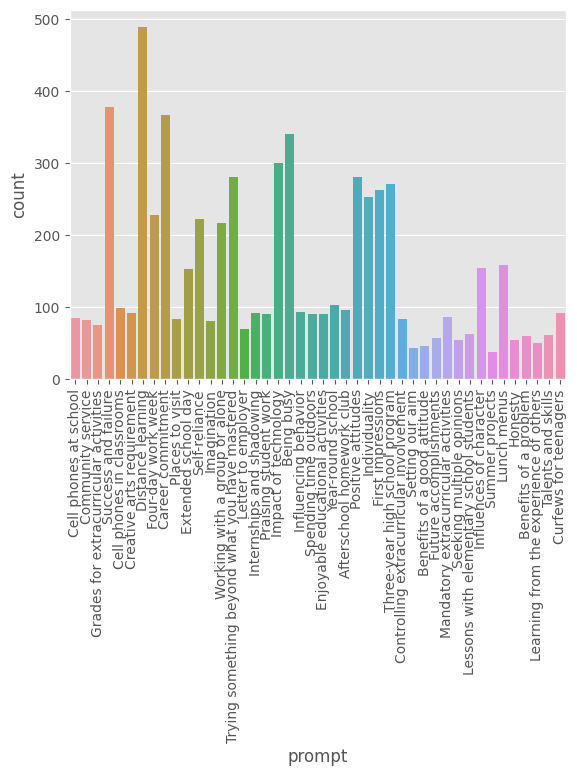

In [16]:
ax = sns.countplot(df, x='prompt')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Independent')]

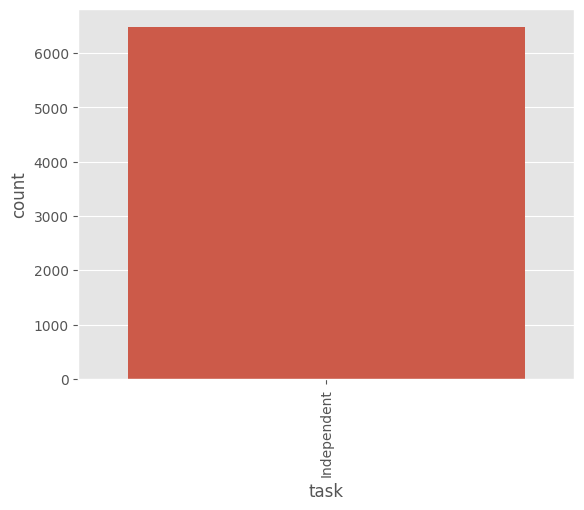

In [17]:
ax = sns.countplot(df, x='task')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)